In [1]:
%load_ext autoreload
%autoreload 2

import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
import sir_model
import json
from random import randint

max I percentage: 0.00192296687623966
argmax I: 50


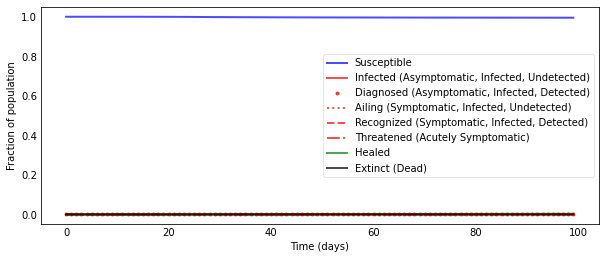

query: 1


In [17]:
# parameters
# set parameter values

# np.piecewise(x, [x < 0, x >= 0], [-1, 1])
# alpha_val = 0.57
# beta_val = 0.011
# delta_val = 0.011
# gamma_val = 0.456

# # epsilon_val = 0.05 #0.171
# # theta_val = 0.371

# zeta_val = 0.125
# eta_val = 0.125

# mu_val = 0.017
# nu_val = 0.027
# lamb_val = 0.034
# rho_val = 0.034

# kappa_val = 0.017
# xi_val = 0.017
# sigma_val = 0.017

# tau_val = 0.01



def alpha(t): return np.piecewise(t, [0<=t<=4, 4<t<=22, 22<t<=28, t>28], [0.57, 0.422, 0.36, 0.210]) # checked
def beta(t): return np.piecewise(t, [0<=t<=4, 4<t<=22, t>22], [0.011, 0.0057, 0.005]) # checked
def delta(t): return np.piecewise(t, [0<=t<=4, 4<t<=22, t>22], [0.011, 0.0057, 0.005]) # checked
def gamma(t): return np.piecewise(t, [0<=t<=4, 4<t<=22, 22<t<=28, t>28], [0.456, 0.285, 0.2, 0.110]) # checked

def epsilon(t): return np.piecewise(t, [0<=t<=12, 12<t<=38, t>38], [0.171, 0.143, 0.2])
def theta(t): return np.piecewise(t, [t>=0], [0.371]) # checked

def zeta(t): return np.piecewise(t, [0<=t<=22, 22<t<=38, t>38], [0.125, 0.034, 0.025])
def eta(t): return np.piecewise(t, [0<=t<=22, 22<t<=38, t>38], [0.125, 0.034, 0.025])

def mu(t): return np.piecewise(t, [0<=t<=22, t>22], [0.017, 0.008])
def nu(t): return np.piecewise(t, [0<=t<=22, t>22], [0.027, 0.015])
def lamb(t): return np.piecewise(t, [0<=t<=22, t>22], [0.034, 0.08])
def rho(t): return np.piecewise(t, [0<=t<=22, 22<t<38, t>38], [0.034, 0.017, 0.02]) # checked

def kappa(t): return np.piecewise(t, [0<=t<=22, 22<t<=38, t>38], [0.017, 0.017, 0.02]) # checked
def xi(t): return np.piecewise(t, [0<=t<=22, 22<t<=38, t>38], [0.017, 0.017, 0.02]) # checked
def sigma(t): return np.piecewise(t, [0<=t<=22, 22<t<=38, t>38], [0.017, 0.017, 0.01]) # checked

def tau(t): return np.piecewise(t, [t>=0], [0.01]) # checked


# USER: set initial conditions
I0, D0, A0, R0, T0, H0, E0 = 200/(60e6), 20/(60e6), 1/(60e6), 2/(60e6), 0, 0, 0
S0 = 1-I0-D0-A0-R0-T0-H0-E0
y0 = S0, I0, D0, A0, R0, T0, H0, E0 # Initial conditions vector
# USER: set simulation parameters
dt = 1
tstart = 0
tend = 100
tvect = np.arange(tstart, tend, dt)
# simulate/solve ODEs
sim = odeint(sir_model.SIDARTHE_model, y0, tvect, args=(alpha, beta, gamma, delta, epsilon, mu, zeta, lamb, eta, rho, theta, kappa, nu, xi, sigma, tau))
S, I, D, A, R, T, H, E = sim.T
print('max I percentage:', max(I+D+A+R+T))
print('argmax I:', np.argmax(I+D+A+R+T))
# plot results - uncomment next line to plot time series.  not recommended for large numbers of points
sir_model.plotSIDARTHE(tvect, S, I, D, A, R, T, H, E)
# USER: write query condition.
query_condition =  (0.0015 <= max(I+D+A+R+T) <= 0.0025) and (45 <= np.argmax(I+D+A+R+T) <= 55)
query = '1' if query_condition else '0'
print('query:', query)
